In [39]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
import sys
sys.path.append('/home/yi/Desktop/simple-faster-rcnn-pytorch')
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from data.dataset import preprocess
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

In [3]:
trainer.load('/home/yi/Desktop/simple-faster-rcnn-pytorch/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

NameError: name 'img' is not defined

/home/yi/Desktop/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


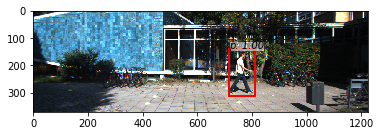

In [15]:
img = read_image('/media/yi/DATA/data-orig/kitti/training/image_2/000000.png')
img = t.from_numpy(img)[None]
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [16]:
_bboxes[0]

array([[139.67877, 716.8146 , 310.8039 , 810.6211 ]], dtype=float32)

In [17]:
_labels[0]

array([14], dtype=int32)

In [18]:
_scores[0]

array([0.9978315], dtype=float32)

In [44]:
def detect_all(image_dir, det_dir):
    class_map = {6: 'Car', 14: 'Pedestrian'}
    image_lists = os.listdir(image_dir)
    image_lists = sorted(image_lists)
    for image_name in image_lists:
        image_file = os.path.join(image_dir, image_name)
        img = read_image(image_file)
        prepared_imgs = [preprocess(at.tonumpy(img))]
        sizes = [img.shape[1:]]        
        _bboxes, _labels, _scores = trainer.faster_rcnn.predict(prepared_imgs, sizes, visualize=False)
        # vis_bbox(at.tonumpy(img[0]),
        #          at.tonumpy(_bboxes[0]),
        #          at.tonumpy(_labels[0]).reshape(-1),
        #          at.tonumpy(_scores[0]).reshape(-1))
        image_id, ext = os.path.splitext(image_name)
        det_name = image_id + '.txt'
        det_file = os.path.join(det_dir, det_name)
        with open(det_file, 'w') as handle:
            for i in range(_bboxes[0].shape[0]):
                if _labels[0][i] in [6, 14]:
                    l = class_map[_labels[0][i]]
                    x0 = _bboxes[0][i, 1]
                    y0 = _bboxes[0][i, 0]
                    x1 = _bboxes[0][i, 3]
                    y1 = _bboxes[0][i, 2]
                    s = _scores[0][i]
                    line = '%s 0 0 0 %.2f %.2f %.2f %.2f 0 0 0 0 0 0 0 %.2f\n' % (l, x0, y0, x1, y1, s)
                    handle.write(line)
        print('finish image %s' % image_name)

In [45]:
image_dir = '/media/yi/DATA/data-orig/kitti/training/image_2'
det_dir = './faster_rcnn_baseline'
detect_all(image_dir, det_dir)

/home/yi/Desktop/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


finish image 000000.png
finish image 000001.png
finish image 000002.png
finish image 000003.png
finish image 000004.png
finish image 000005.png
finish image 000006.png
finish image 000007.png
finish image 000008.png
finish image 000009.png
finish image 000010.png
finish image 000011.png
finish image 000012.png
finish image 000013.png
finish image 000014.png
finish image 000015.png
finish image 000016.png
finish image 000017.png
finish image 000018.png
finish image 000019.png
finish image 000020.png
finish image 000021.png
finish image 000022.png
finish image 000023.png
finish image 000024.png
finish image 000025.png
finish image 000026.png
finish image 000027.png
finish image 000028.png
finish image 000029.png
finish image 000030.png
finish image 000031.png
finish image 000032.png
finish image 000033.png
finish image 000034.png
finish image 000035.png
finish image 000036.png
finish image 000037.png
finish image 000038.png
finish image 000039.png
finish image 000040.png
finish image 000

finish image 000342.png
finish image 000343.png
finish image 000344.png
finish image 000345.png
finish image 000346.png
finish image 000347.png
finish image 000348.png
finish image 000349.png
finish image 000350.png
finish image 000351.png
finish image 000352.png
finish image 000353.png
finish image 000354.png
finish image 000355.png
finish image 000356.png
finish image 000357.png
finish image 000358.png
finish image 000359.png
finish image 000360.png
finish image 000361.png
finish image 000362.png
finish image 000363.png
finish image 000364.png
finish image 000365.png
finish image 000366.png
finish image 000367.png
finish image 000368.png
finish image 000369.png
finish image 000370.png
finish image 000371.png
finish image 000372.png
finish image 000373.png
finish image 000374.png
finish image 000375.png
finish image 000376.png
finish image 000377.png
finish image 000378.png
finish image 000379.png
finish image 000380.png
finish image 000381.png
finish image 000382.png
finish image 000

finish image 000684.png
finish image 000685.png
finish image 000686.png
finish image 000687.png
finish image 000688.png
finish image 000689.png
finish image 000690.png
finish image 000691.png
finish image 000692.png
finish image 000693.png
finish image 000694.png
finish image 000695.png
finish image 000696.png
finish image 000697.png
finish image 000698.png
finish image 000699.png
finish image 000700.png
finish image 000701.png
finish image 000702.png
finish image 000703.png
finish image 000704.png
finish image 000705.png
finish image 000706.png
finish image 000707.png
finish image 000708.png
finish image 000709.png
finish image 000710.png
finish image 000711.png
finish image 000712.png
finish image 000713.png
finish image 000714.png
finish image 000715.png
finish image 000716.png
finish image 000717.png
finish image 000718.png
finish image 000719.png
finish image 000720.png
finish image 000721.png
finish image 000722.png
finish image 000723.png
finish image 000724.png
finish image 000

finish image 001026.png
finish image 001027.png
finish image 001028.png
finish image 001029.png
finish image 001030.png
finish image 001031.png
finish image 001032.png
finish image 001033.png
finish image 001034.png
finish image 001035.png
finish image 001036.png
finish image 001037.png
finish image 001038.png
finish image 001039.png
finish image 001040.png
finish image 001041.png
finish image 001042.png
finish image 001043.png
finish image 001044.png
finish image 001045.png
finish image 001046.png
finish image 001047.png
finish image 001048.png
finish image 001049.png
finish image 001050.png
finish image 001051.png
finish image 001052.png
finish image 001053.png
finish image 001054.png
finish image 001055.png
finish image 001056.png
finish image 001057.png
finish image 001058.png
finish image 001059.png
finish image 001060.png
finish image 001061.png
finish image 001062.png
finish image 001063.png
finish image 001064.png
finish image 001065.png
finish image 001066.png
finish image 001

finish image 001368.png
finish image 001369.png
finish image 001370.png
finish image 001371.png
finish image 001372.png
finish image 001373.png
finish image 001374.png
finish image 001375.png
finish image 001376.png
finish image 001377.png
finish image 001378.png
finish image 001379.png
finish image 001380.png
finish image 001381.png
finish image 001382.png
finish image 001383.png
finish image 001384.png
finish image 001385.png
finish image 001386.png
finish image 001387.png
finish image 001388.png
finish image 001389.png
finish image 001390.png
finish image 001391.png
finish image 001392.png
finish image 001393.png
finish image 001394.png
finish image 001395.png
finish image 001396.png
finish image 001397.png
finish image 001398.png
finish image 001399.png
finish image 001400.png
finish image 001401.png
finish image 001402.png
finish image 001403.png
finish image 001404.png
finish image 001405.png
finish image 001406.png
finish image 001407.png
finish image 001408.png
finish image 001

finish image 001710.png
finish image 001711.png
finish image 001712.png
finish image 001713.png
finish image 001714.png
finish image 001715.png
finish image 001716.png
finish image 001717.png
finish image 001718.png
finish image 001719.png
finish image 001720.png
finish image 001721.png
finish image 001722.png
finish image 001723.png
finish image 001724.png
finish image 001725.png
finish image 001726.png
finish image 001727.png
finish image 001728.png
finish image 001729.png
finish image 001730.png
finish image 001731.png
finish image 001732.png
finish image 001733.png
finish image 001734.png
finish image 001735.png
finish image 001736.png
finish image 001737.png
finish image 001738.png
finish image 001739.png
finish image 001740.png
finish image 001741.png
finish image 001742.png
finish image 001743.png
finish image 001744.png
finish image 001745.png
finish image 001746.png
finish image 001747.png
finish image 001748.png
finish image 001749.png
finish image 001750.png
finish image 001

finish image 002052.png
finish image 002053.png
finish image 002054.png
finish image 002055.png
finish image 002056.png
finish image 002057.png
finish image 002058.png
finish image 002059.png
finish image 002060.png
finish image 002061.png
finish image 002062.png
finish image 002063.png
finish image 002064.png
finish image 002065.png
finish image 002066.png
finish image 002067.png
finish image 002068.png
finish image 002069.png
finish image 002070.png
finish image 002071.png
finish image 002072.png
finish image 002073.png
finish image 002074.png
finish image 002075.png
finish image 002076.png
finish image 002077.png
finish image 002078.png
finish image 002079.png
finish image 002080.png
finish image 002081.png
finish image 002082.png
finish image 002083.png
finish image 002084.png
finish image 002085.png
finish image 002086.png
finish image 002087.png
finish image 002088.png
finish image 002089.png
finish image 002090.png
finish image 002091.png
finish image 002092.png
finish image 002

finish image 002394.png
finish image 002395.png
finish image 002396.png
finish image 002397.png
finish image 002398.png
finish image 002399.png
finish image 002400.png
finish image 002401.png
finish image 002402.png
finish image 002403.png
finish image 002404.png
finish image 002405.png
finish image 002406.png
finish image 002407.png
finish image 002408.png
finish image 002409.png
finish image 002410.png
finish image 002411.png
finish image 002412.png
finish image 002413.png
finish image 002414.png
finish image 002415.png
finish image 002416.png
finish image 002417.png
finish image 002418.png
finish image 002419.png
finish image 002420.png
finish image 002421.png
finish image 002422.png
finish image 002423.png
finish image 002424.png
finish image 002425.png
finish image 002426.png
finish image 002427.png
finish image 002428.png
finish image 002429.png
finish image 002430.png
finish image 002431.png
finish image 002432.png
finish image 002433.png
finish image 002434.png
finish image 002

finish image 002736.png
finish image 002737.png
finish image 002738.png
finish image 002739.png
finish image 002740.png
finish image 002741.png
finish image 002742.png
finish image 002743.png
finish image 002744.png
finish image 002745.png
finish image 002746.png
finish image 002747.png
finish image 002748.png
finish image 002749.png
finish image 002750.png
finish image 002751.png
finish image 002752.png
finish image 002753.png
finish image 002754.png
finish image 002755.png
finish image 002756.png
finish image 002757.png
finish image 002758.png
finish image 002759.png
finish image 002760.png
finish image 002761.png
finish image 002762.png
finish image 002763.png
finish image 002764.png
finish image 002765.png
finish image 002766.png
finish image 002767.png
finish image 002768.png
finish image 002769.png
finish image 002770.png
finish image 002771.png
finish image 002772.png
finish image 002773.png
finish image 002774.png
finish image 002775.png
finish image 002776.png
finish image 002

finish image 003078.png
finish image 003079.png
finish image 003080.png
finish image 003081.png
finish image 003082.png
finish image 003083.png
finish image 003084.png
finish image 003085.png
finish image 003086.png
finish image 003087.png
finish image 003088.png
finish image 003089.png
finish image 003090.png
finish image 003091.png
finish image 003092.png
finish image 003093.png
finish image 003094.png
finish image 003095.png
finish image 003096.png
finish image 003097.png
finish image 003098.png
finish image 003099.png
finish image 003100.png
finish image 003101.png
finish image 003102.png
finish image 003103.png
finish image 003104.png
finish image 003105.png
finish image 003106.png
finish image 003107.png
finish image 003108.png
finish image 003109.png
finish image 003110.png
finish image 003111.png
finish image 003112.png
finish image 003113.png
finish image 003114.png
finish image 003115.png
finish image 003116.png
finish image 003117.png
finish image 003118.png
finish image 003

finish image 003420.png
finish image 003421.png
finish image 003422.png
finish image 003423.png
finish image 003424.png
finish image 003425.png
finish image 003426.png
finish image 003427.png
finish image 003428.png
finish image 003429.png
finish image 003430.png
finish image 003431.png
finish image 003432.png
finish image 003433.png
finish image 003434.png
finish image 003435.png
finish image 003436.png
finish image 003437.png
finish image 003438.png
finish image 003439.png
finish image 003440.png
finish image 003441.png
finish image 003442.png
finish image 003443.png
finish image 003444.png
finish image 003445.png
finish image 003446.png
finish image 003447.png
finish image 003448.png
finish image 003449.png
finish image 003450.png
finish image 003451.png
finish image 003452.png
finish image 003453.png
finish image 003454.png
finish image 003455.png
finish image 003456.png
finish image 003457.png
finish image 003458.png
finish image 003459.png
finish image 003460.png
finish image 003

finish image 003762.png
finish image 003763.png
finish image 003764.png
finish image 003765.png
finish image 003766.png
finish image 003767.png
finish image 003768.png
finish image 003769.png
finish image 003770.png
finish image 003771.png
finish image 003772.png
finish image 003773.png
finish image 003774.png
finish image 003775.png
finish image 003776.png
finish image 003777.png
finish image 003778.png
finish image 003779.png
finish image 003780.png
finish image 003781.png
finish image 003782.png
finish image 003783.png
finish image 003784.png
finish image 003785.png
finish image 003786.png
finish image 003787.png
finish image 003788.png
finish image 003789.png
finish image 003790.png
finish image 003791.png
finish image 003792.png
finish image 003793.png
finish image 003794.png
finish image 003795.png
finish image 003796.png
finish image 003797.png
finish image 003798.png
finish image 003799.png
finish image 003800.png
finish image 003801.png
finish image 003802.png
finish image 003

finish image 004104.png
finish image 004105.png
finish image 004106.png
finish image 004107.png
finish image 004108.png
finish image 004109.png
finish image 004110.png
finish image 004111.png
finish image 004112.png
finish image 004113.png
finish image 004114.png
finish image 004115.png
finish image 004116.png
finish image 004117.png
finish image 004118.png
finish image 004119.png
finish image 004120.png
finish image 004121.png
finish image 004122.png
finish image 004123.png
finish image 004124.png
finish image 004125.png
finish image 004126.png
finish image 004127.png
finish image 004128.png
finish image 004129.png
finish image 004130.png
finish image 004131.png
finish image 004132.png
finish image 004133.png
finish image 004134.png
finish image 004135.png
finish image 004136.png
finish image 004137.png
finish image 004138.png
finish image 004139.png
finish image 004140.png
finish image 004141.png
finish image 004142.png
finish image 004143.png
finish image 004144.png
finish image 004

finish image 004446.png
finish image 004447.png
finish image 004448.png
finish image 004449.png
finish image 004450.png
finish image 004451.png
finish image 004452.png
finish image 004453.png
finish image 004454.png
finish image 004455.png
finish image 004456.png
finish image 004457.png
finish image 004458.png
finish image 004459.png
finish image 004460.png
finish image 004461.png
finish image 004462.png
finish image 004463.png
finish image 004464.png
finish image 004465.png
finish image 004466.png
finish image 004467.png
finish image 004468.png
finish image 004469.png
finish image 004470.png
finish image 004471.png
finish image 004472.png
finish image 004473.png
finish image 004474.png
finish image 004475.png
finish image 004476.png
finish image 004477.png
finish image 004478.png
finish image 004479.png
finish image 004480.png
finish image 004481.png
finish image 004482.png
finish image 004483.png
finish image 004484.png
finish image 004485.png
finish image 004486.png
finish image 004

finish image 004788.png
finish image 004789.png
finish image 004790.png
finish image 004791.png
finish image 004792.png
finish image 004793.png
finish image 004794.png
finish image 004795.png
finish image 004796.png
finish image 004797.png
finish image 004798.png
finish image 004799.png
finish image 004800.png
finish image 004801.png
finish image 004802.png
finish image 004803.png
finish image 004804.png
finish image 004805.png
finish image 004806.png
finish image 004807.png
finish image 004808.png
finish image 004809.png
finish image 004810.png
finish image 004811.png
finish image 004812.png
finish image 004813.png
finish image 004814.png
finish image 004815.png
finish image 004816.png
finish image 004817.png
finish image 004818.png
finish image 004819.png
finish image 004820.png
finish image 004821.png
finish image 004822.png
finish image 004823.png
finish image 004824.png
finish image 004825.png
finish image 004826.png
finish image 004827.png
finish image 004828.png
finish image 004

finish image 005130.png
finish image 005131.png
finish image 005132.png
finish image 005133.png
finish image 005134.png
finish image 005135.png
finish image 005136.png
finish image 005137.png
finish image 005138.png
finish image 005139.png
finish image 005140.png
finish image 005141.png
finish image 005142.png
finish image 005143.png
finish image 005144.png
finish image 005145.png
finish image 005146.png
finish image 005147.png
finish image 005148.png
finish image 005149.png
finish image 005150.png
finish image 005151.png
finish image 005152.png
finish image 005153.png
finish image 005154.png
finish image 005155.png
finish image 005156.png
finish image 005157.png
finish image 005158.png
finish image 005159.png
finish image 005160.png
finish image 005161.png
finish image 005162.png
finish image 005163.png
finish image 005164.png
finish image 005165.png
finish image 005166.png
finish image 005167.png
finish image 005168.png
finish image 005169.png
finish image 005170.png
finish image 005

finish image 005472.png
finish image 005473.png
finish image 005474.png
finish image 005475.png
finish image 005476.png
finish image 005477.png
finish image 005478.png
finish image 005479.png
finish image 005480.png
finish image 005481.png
finish image 005482.png
finish image 005483.png
finish image 005484.png
finish image 005485.png
finish image 005486.png
finish image 005487.png
finish image 005488.png
finish image 005489.png
finish image 005490.png
finish image 005491.png
finish image 005492.png
finish image 005493.png
finish image 005494.png
finish image 005495.png
finish image 005496.png
finish image 005497.png
finish image 005498.png
finish image 005499.png
finish image 005500.png
finish image 005501.png
finish image 005502.png
finish image 005503.png
finish image 005504.png
finish image 005505.png
finish image 005506.png
finish image 005507.png
finish image 005508.png
finish image 005509.png
finish image 005510.png
finish image 005511.png
finish image 005512.png
finish image 005

finish image 005814.png
finish image 005815.png
finish image 005816.png
finish image 005817.png
finish image 005818.png
finish image 005819.png
finish image 005820.png
finish image 005821.png
finish image 005822.png
finish image 005823.png
finish image 005824.png
finish image 005825.png
finish image 005826.png
finish image 005827.png
finish image 005828.png
finish image 005829.png
finish image 005830.png
finish image 005831.png
finish image 005832.png
finish image 005833.png
finish image 005834.png
finish image 005835.png
finish image 005836.png
finish image 005837.png
finish image 005838.png
finish image 005839.png
finish image 005840.png
finish image 005841.png
finish image 005842.png
finish image 005843.png
finish image 005844.png
finish image 005845.png
finish image 005846.png
finish image 005847.png
finish image 005848.png
finish image 005849.png
finish image 005850.png
finish image 005851.png
finish image 005852.png
finish image 005853.png
finish image 005854.png
finish image 005

finish image 006156.png
finish image 006157.png
finish image 006158.png
finish image 006159.png
finish image 006160.png
finish image 006161.png
finish image 006162.png
finish image 006163.png
finish image 006164.png
finish image 006165.png
finish image 006166.png
finish image 006167.png
finish image 006168.png
finish image 006169.png
finish image 006170.png
finish image 006171.png
finish image 006172.png
finish image 006173.png
finish image 006174.png
finish image 006175.png
finish image 006176.png
finish image 006177.png
finish image 006178.png
finish image 006179.png
finish image 006180.png
finish image 006181.png
finish image 006182.png
finish image 006183.png
finish image 006184.png
finish image 006185.png
finish image 006186.png
finish image 006187.png
finish image 006188.png
finish image 006189.png
finish image 006190.png
finish image 006191.png
finish image 006192.png
finish image 006193.png
finish image 006194.png
finish image 006195.png
finish image 006196.png
finish image 006

finish image 006498.png
finish image 006499.png
finish image 006500.png
finish image 006501.png
finish image 006502.png
finish image 006503.png
finish image 006504.png
finish image 006505.png
finish image 006506.png
finish image 006507.png
finish image 006508.png
finish image 006509.png
finish image 006510.png
finish image 006511.png
finish image 006512.png
finish image 006513.png
finish image 006514.png
finish image 006515.png
finish image 006516.png
finish image 006517.png
finish image 006518.png
finish image 006519.png
finish image 006520.png
finish image 006521.png
finish image 006522.png
finish image 006523.png
finish image 006524.png
finish image 006525.png
finish image 006526.png
finish image 006527.png
finish image 006528.png
finish image 006529.png
finish image 006530.png
finish image 006531.png
finish image 006532.png
finish image 006533.png
finish image 006534.png
finish image 006535.png
finish image 006536.png
finish image 006537.png
finish image 006538.png
finish image 006

finish image 006840.png
finish image 006841.png
finish image 006842.png
finish image 006843.png
finish image 006844.png
finish image 006845.png
finish image 006846.png
finish image 006847.png
finish image 006848.png
finish image 006849.png
finish image 006850.png
finish image 006851.png
finish image 006852.png
finish image 006853.png
finish image 006854.png
finish image 006855.png
finish image 006856.png
finish image 006857.png
finish image 006858.png
finish image 006859.png
finish image 006860.png
finish image 006861.png
finish image 006862.png
finish image 006863.png
finish image 006864.png
finish image 006865.png
finish image 006866.png
finish image 006867.png
finish image 006868.png
finish image 006869.png
finish image 006870.png
finish image 006871.png
finish image 006872.png
finish image 006873.png
finish image 006874.png
finish image 006875.png
finish image 006876.png
finish image 006877.png
finish image 006878.png
finish image 006879.png
finish image 006880.png
finish image 006

finish image 007182.png
finish image 007183.png
finish image 007184.png
finish image 007185.png
finish image 007186.png
finish image 007187.png
finish image 007188.png
finish image 007189.png
finish image 007190.png
finish image 007191.png
finish image 007192.png
finish image 007193.png
finish image 007194.png
finish image 007195.png
finish image 007196.png
finish image 007197.png
finish image 007198.png
finish image 007199.png
finish image 007200.png
finish image 007201.png
finish image 007202.png
finish image 007203.png
finish image 007204.png
finish image 007205.png
finish image 007206.png
finish image 007207.png
finish image 007208.png
finish image 007209.png
finish image 007210.png
finish image 007211.png
finish image 007212.png
finish image 007213.png
finish image 007214.png
finish image 007215.png
finish image 007216.png
finish image 007217.png
finish image 007218.png
finish image 007219.png
finish image 007220.png
finish image 007221.png
finish image 007222.png
finish image 007